# 🎯 Aula 1 - Introdução ao Pandas - dados tabulares 🎯<br>


Na aula de hoje veremos com trabalhar com dados tabulares em alto nível, usando a biblioteca [pandas](https://pandas.pydata.org/).

O [Pandas](https://pandas.pydata.org/) é uma das bibliotecas mais usadas em **ciência de dados**.

Esta biblioteca, construída a partir do Numpy, possibilita a estruturação e manipulação de dados de maneira simples e eficiente.

Como os dados são a matéria prima de todo projeto de Data Science, manipulá-los é fundamental! Por isso, utilizaremos o Pandas em quase todas as aulas daqui pra frente!

____
[Guia do pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

____
Nesta primeira aula, avaliaremos:
- O que são Séries e DataFrames;
- Alguns dos principais métodos para operar com Séries;
- Leitura e gravação de conjuntos de dados com pandas.

____
Até então trabalhamos em análises de dados utilizando listas, dicionários, etc...
Mas pensando em observar dados de tabelas, qual a primeira ferramenta que vem a mente?

Em que situações utilizamos esta ferramenta? E quais suas desvantagens em relação a visualização e manipulação de dados?

# Instalando e importando o Pandas

Primeiro passo para utilizarmos o Pandas (package de manipulação de dados do python). Escreva o comando abaixo no terminal associado ao enviroment do python que estás a usar:

``` sh
pip install pandas
```
<br>
Em seguida, rodamos o comando abaixo no notebook para importar o pandas 

```python
import pandas
```

Caso a etapa anterior não tenha dado certo, surgirá um erro ao importar.

In [ ]:
#importar o pandas com alias pd
import pandas as pd

# Séries

Antes de falarmos das potencialidades do *Pandas*, precisamos falar das suas estruturas básicas.

O objeto fundamental do Pandas são as **Series**. As Series são as **colunas das tabelas** (que veremos mais a frente), e por baixo dos panos, os dados ficam armazenados como numpy arrays!

A diferença é que a série possui um **índice associado as linhas**, permitindo o acesso aos conteúdos dessa estrutura por ele, como um dicionário.

Além disso, as séries têm métodos específicos que serão super úteis para nossas análises e manipulações de dados.

## Gerando uma Series
Podemos criar uma série **a partir de uma lista**, usando a função do pandas `pd.Series()`:

In [ ]:
#Criando uma lista
lista = [4,6,3,7,25]
lista
# Série a partir de uma lista
# os índices das linhas são automaticamente definidos
serie = pd.Series(lista)

In [ ]:
serie

Os números à esquerda são os **índices** da série, e, aqueles à direita, são seus **valores**. Podemos também acessá-los separadamente.

In [ ]:
# valores
serie.values

In [ ]:
# índices
serie.index

A obtenção de itens de uma Series é muito similar à maneira de como fazemos com listas:

In [ ]:
serie[0]

Também podemos realizar slicing nas Series, tal como fazemos nas listas.

## Extra: Operações com séries

Como são gerados como numpy arrays, de modo semelhante, operações com séries são realizadas elemento a elemento. E assim podemos somar, multiplicar, realizar qualquer cálculo com as Series.


In [ ]:
# Criando duas Series de listas de mesmo tamanho
series1 = pd.Series(range(1,10))
series2 = pd.Series([0,1,100]*3)

In [ ]:
# Operações aritméticas básicas funcionam elemento a elemento
# soma
series1+5

In [ ]:
# soma de series
series1+series2

In [ ]:
# multiplicacao
serie*5

In [ ]:
# multiplicacao
series1 * series2

In [ ]:
# Condicionais / verificaçoes
# numeros pares
series1 % 2 == 0

In [ ]:
# numeros maiores que 10
series2 > 10

E com dados de formatos diferentes?

In [3]:
s_texto = pd.Series(['a','b','c'])
s_numero = pd.Series([1,2,3])

O que acontecia com strings mutiplicadas por números inteiros mesmo?

In [ ]:
# Com strings
print('a'*1)
print('b'*2)
print('c'*3)

O mesmo efeito acontece entre a multiplicação de series entre strings e números

In [ ]:
# Mesmo efeito para as séries
s_texto*s_numero

# DataFrame

Agora que conhecemos as séries, vamos partir pro objeto do Pandas que mais utilizaremos: o **DataFrame**. <br>
Como veremos a seguir, o DataFrame é uma estrutura que se assemalha a uma **tabela** do excel. <br>

Estruturalmente, o DataFrame nada mais é que um **conjunto de Series**, uma para cada coluna (e, claro, com mesmo índice, que irão indexar as linhas).
Veremos depois como **ler um dataframe a partir de um arquivo** (que é provavelmente a forma mais comum).

Há muitas formas de construir um DataFrame do zero. Todas elas fazem uso da função **pd.DataFrame()**, como veremos a seguir. Se quisermos especificar os índices de linha, o nome das colunas, e os dados, podemos passá-los separadamente.

**Obs.:** As colunas dos DataFrames são Series. Assim, tudo que vimos para as séries se aplica para cada coluna do DataFrame!

In [8]:
# Gerando uma matriz (5,3) de números inteiros
nrows = 5
ncols = 3
matriz = [[item*r for item in range(1,ncols+1)] for r in range(1,nrows+1)]
matriz

[[1, 2, 3], [2, 4, 6], [3, 6, 9], [4, 8, 12], [5, 10, 15]]

In [ ]:
#Transformando essa matriz em um DF
pd.DataFrame(matriz)

In [ ]:
# Conseguimos definir nomes pros índices e colunas
df = pd.DataFrame(matriz,
                               index = ['aluno1','aluno2','aluno3','aluno4','aluno5'],
                               columns=['id','nota','aulas_presente'])

In [ ]:
df

## Acessando posições do dataframe

- .loc(): acessamos os rótulos com os **nomes** das linhas e colunas;
- .iloc(): acessamos os índices numéricos das linhas e colunas.

In [ ]:
# acessar a nota do aluno4
df.loc['aluno4','col2']

In [ ]:
# o mesmo acima usando iloc
df.iloc[3,1]

Podemos selecionar uma coluna específica ou colunas específicas do DF.

In [ ]:
# uma col
df['aulas_presente']

In [ ]:
#multiplas cols
df[['id','aulas_presente']]

In [ ]:
# slicing de linhas e cols
df.loc['aluno2':'aluno4','nota':]

In [ ]:
# utilizando o iloc
df.iloc[1:4,1:]

Analogamente, podemos usar o `iloc` para obter os mesmos dados utilizando os índices (fica como tarefa para você demonstrar isto).

As colunas do dataframe são séries. Assim, tudo que vimos para as séries, se estende individualmente para cada coluna!

# Outros métodos para DataFrames

Como uma coluna de um DF é uma Série, a maioria dos métodos que veremos para DataFrames também são aplicados as Series.

Veremos 2 que trazem informações sobre nosso DF: `info`() e `dtypes` e `shape`.

## shape

In [ ]:
df.shape

## info()

In [ ]:
df.info()

também podemos acessar os tipos de dados por coluna separadamente utilizando o `dtypes`

In [ ]:
df.dtypes

Podemos ainda, trocar o tipo de alguma variável. Exemplo, trocar uma coluna de inteiro para decimal:

In [ ]:
df['col2'] = df['col2'].astype(float)

## head()

In [ ]:
#Ver as primeiras 5 linhas
df.head()

In [ ]:
# Ver as primeiras 7 linhas
df.head(7)

## tail()

In [ ]:
#Ver as últimas 5 linhas (análogo ao `head` pode-se alterar a quantidade de linhas)
df.tail()

# Máscara booleana

A máscara booleana é uma técnica no Pandas para filtrar dados com base em condições. Vamos aprender como criar e usar máscaras booleanas para selecionar partes específicas dos dados.<br>
Utilizaremos ela também em outras funções, como `loc[]`.

Imagine que queiramos filtrar somente os alunos com `nota` maiores que 5 no DataFrame. 

Primeiro aplicamos uma condição na coluna (Series) em que traz somente `True` ou `False`:

In [ ]:
mask = df['nota'] > 5

Em seguida aplicamos este resultado no DataFrame. Isto significa que só queremos exibir as linhas em que a condição é satisfeita (também podemos aplicar no `loc` a mesma condição):

In [ ]:
df[mask]
df.loc[mask]

Caso o filtro aplicado não seja tão complexo, não há problema escrever a condição da máscara booleana inteira.

```python
df[df['nota'] > 5]
```

# Importando dados

A forma mais comum de se construir um dataframe é a partir da **leitura de um arquivo** (.csv, .xls, .xlsx, .ods, .txt, .json, etc.)

O pandas é capaz de ler todos esses formatos, com funções específicas!

## Arquivos CSV

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Vamos ler os dados do avaliaçãoes de restaurantes de New York do arquivo `Cuisine_ratings.csv` na pasta `data` e criar um DataFrame:

In [ ]:
#import
import pandas as pd

# Lendo um arquivo CSV e criando um DataFrame
df_rating = pd.read_csv('./data/Cuisine_rating.csv')

In [ ]:
df_rating

Podemos aplicar todos os métodos vistos anteriormente para analisar o dataset carregado acima. 

## EXTRA: Planilha Excel (XLS ou XLSX)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

Vamos criar um dataframe com os dados da Selic vindos de uma planilha de excel `selic.xlsx` na pasta `data`

In [ ]:
#pip install openpyxl -- pode ser necessário instalar openpyxl, mas tente rodar o exemplo abaixo primeiro

In [ ]:
df_selic = pd.read_excel('./data/selic.xlsx')

In [ ]:
df_selic

**Leitura com seleção de planilha**

Podemos também carregar somente uma determinada sheet utilizando o param `sheet_name` na função `read_excel`

In [ ]:
df_titanic = pd.read_excel('./data/titanic.xlsx',sheet_name='Sheet1')

In [ ]:
df_titanic

___
# Hands-on

Neste Hands-on vamos realizar alguns passos do EDA no step 0 `Reconhecimento dos dados` e alguns insights também.

1. Carregar os dados de avaliações de restaurantes de New York `Cuisine_rating.csv`

In [2]:
import pandas as pd
df_rating = pd.read_csv('./data/Cuisine_rating.csv')

2. Ver os primeiros 7 dados do topo e do fim do dataset.

In [3]:
df_rating.head(7)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
5,6,111,"China Town, NY",Male,1995,Single,Student,5,Seafood,Never,Never,5,1,3.0,No
6,7,111,"China Town, NY",Female,1977,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No


3. Exibir todas as possíveis informações basicas do dataset (tamanho, tipos de dados, ...)

In [12]:
# info
df_rating.info()
# describe
df_rating.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


4. Filtre o dataframe entre clientes estudantes e profissionais na column `Activity` com as categorias `Student` e `Professional`, respectivamente.<br>
Salve os filtros (máscaras booleanas) em variáveis diferentes.

In [15]:
mask_students = df_rating['Activity']=="Student"
mask_professional = df_rating['Activity']=="Professional"

5. Filtre novamente o DataFrame, porém agora entre clientes casados e solteiros (analise o dataset para descobrir como fazê-lo).<br>
Salve os filtros (máscaras booleanas) em variáveis diferentes.

In [19]:
mask_single = df_rating['Marital Status']=="Single"
mask_married = df_rating['Marital Status']=="Married"

6. Realize o mesmo que no exer anterior, porém somente com restaurantes indiano e italiano e japonês.
Salve o filtro (máscaras booleanas) em uma variável.

In [22]:
mask_cuisines_ind_ita_jap = df_rating['Cuisines'].isin(('Indian','Italian','Japanese'))
df_rating[mask_cuisines_ind_ita_jap]

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
6,7,111,"China Town, NY",Female,1977,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No
8,9,107,"Riverdale,NY",Male,1965,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,186,136,"Riverdale,NY",Male,1999,Single,Student,4,Japanese,Often,Often,4,1,2.5,Yes
189,190,167,"St. George,NY",Male,1988,Divorced,Professional,3,Indian,Often,Often,5,5,5.0,Yes
190,191,185,"Cedar Hill, NY",Male,1960,Married,Professional,4,Indian,Socially,Socially,2,5,3.5,No
194,195,107,"China Town, NY",Male,1974,Married,Student,3,Indian,Often,Often,2,5,3.5,Yes


7. Utilizando os filtros salvos em variaveis nos exer 4,5 e 6, filtre o dataset para mostrar somente os clientes profissionais e casados que gostam de restaurantes indiano, italiano e japonês. Não precisa salvar o filtro aplicado.

In [24]:
df_filtrado = df_rating[mask_professional & mask_married & mask_cuisines_ind_ita_jap]

8. Sobre o dataset filtrado, quantos clientes deram avaliação para a comida mais de 3 estrelas?

In [27]:
df_filtrado[df_filtrado['Food Rating']>3]

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
44,45,123,"St. George,NY",Female,1969,Married,Professional,3,Italian,Often,Never,4,1,2.5,No
67,68,154,"Market City, NY",Male,2000,Married,Professional,3,Indian,Never,Often,5,2,3.5,No
106,107,188,"China Town, NY",Female,1977,Married,Professional,5,Indian,Never,Socially,5,4,4.5,No
144,145,199,"St. George,NY",Female,1969,Married,Professional,3,Italian,Often,Never,4,1,2.5,No
167,168,182,"Market City, NY",Male,2000,Married,Professional,3,Indian,Never,Often,5,2,3.5,No


9. Compare agora o resultado com a quantidade de clientes que deram avaliação geral mais que 3 estrelas. Algum desses clientes também estão nos resultados do exer anterior?

In [28]:
df_filtrado[df_filtrado['Overall Rating']>3]

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
67,68,154,"Market City, NY",Male,2000,Married,Professional,3,Indian,Never,Often,5,2,3.5,No
90,91,154,"Cedar Hill, NY",Male,1960,Married,Professional,4,Indian,Socially,Socially,2,5,3.5,No
106,107,188,"China Town, NY",Female,1977,Married,Professional,5,Indian,Never,Socially,5,4,4.5,No
167,168,182,"Market City, NY",Male,2000,Married,Professional,3,Indian,Never,Often,5,2,3.5,No
190,191,185,"Cedar Hill, NY",Male,1960,Married,Professional,4,Indian,Socially,Socially,2,5,3.5,No


10. Agora realize os mesmos passos para analisar a seguinte análise: Qual é o publico alvo destes dados e o que mais gostam de comer? O que todos eles podem ter em comum?

<Axes: ylabel='Frequency'>

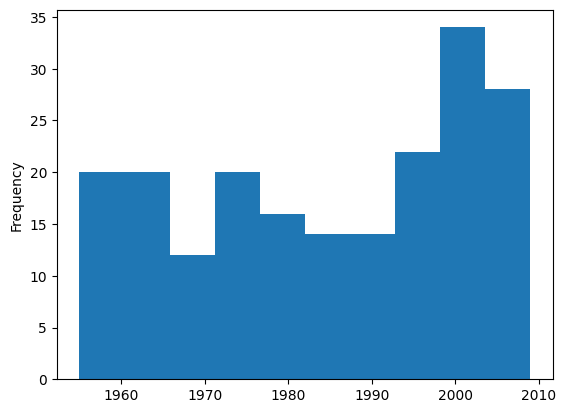

In [34]:
df_rating['YOB'].plot(kind='hist')